# Image Classification using CNNs with Keras

## Importing libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.4.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? True


## Preprocessing Data

In [2]:
def get_three_classes(x,y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test   = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


## Visualize Data

In [4]:
class_names = ['aeroplane', 'car', 'bird']

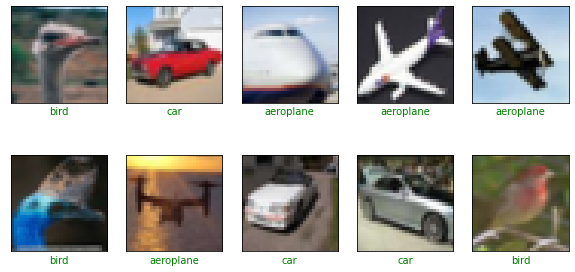

In [5]:
def Show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 
                             10,
                             replace = False)
  
  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize = (10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color = col)
  plt.show()

Show_random_examples(x_train, y_train, y_train)

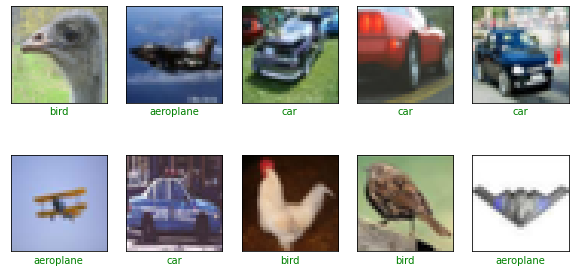

In [6]:
Show_random_examples(x_test, y_test, y_test)


## Create model

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [8]:
def Create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters,
                         3, 
                         activation = 'relu',
                         padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,
                         3,
                         activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam', 
                  metrics=['accuracy'])
    return model

model = Create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

## Train the model

In [11]:
h = model.fit(x_train/255.,
              y_train,
              validation_data = (x_test/255., y_test),
              epochs = 20, 
              batch_size = 128,
              callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2),
                         tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                                            save_best_only = True,
                                                            save_weights_only = False,
                                                            monitor = 'val_accuracy')
                         ]
              )

Epoch 1/20
118/118 [==============================] - 1s 10ms/step - loss: 0.2822 - accuracy: 0.8925 - val_loss: 0.3716 - val_accuracy: 0.8560
Epoch 2/20
118/118 [==============================] - 1s 9ms/step - loss: 0.2662 - accuracy: 0.8962 - val_loss: 0.2979 - val_accuracy: 0.8807
Epoch 3/20
118/118 [==============================] - 1s 9ms/step - loss: 0.2597 - accuracy: 0.8980 - val_loss: 0.2460 - val_accuracy: 0.9020
Epoch 4/20
118/118 [==============================] - 1s 9ms/step - loss: 0.2471 - accuracy: 0.9066 - val_loss: 0.4872 - val_accuracy: 0.8430
Epoch 5/20
118/118 [==============================] - 1s 9ms/step - loss: 0.2283 - accuracy: 0.9121 - val_loss: 0.2488 - val_accuracy: 0.9127
Epoch 6/20
118/118 [==============================] - 1s 9ms/step - loss: 0.2267 - accuracy: 0.9120 - val_loss: 0.8766 - val_accuracy: 0.7790
Epoch 7/20
118/118 [==============================] - 1s 9ms/step - loss: 0.2213 - accuracy: 0.9165 - val_loss: 0.2407 - val_accuracy: 0.9127
